<a href="https://colab.research.google.com/github/byu-cce270/content/blob/main/docs/unit3/05_pandas_part2/in_class_pandaspart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas part 2 In-Class assignment.
## Date Time Data


We will create some datatime data, add columns for the months and days, add data, then plot it.

## Naming
You don't have to do it, but it is common to use varilables with an _df for pandas data frames. For example:

`date_df` for a data frame with dates.
`accidents_df` for a data frame with accidents, etc.

In [1]:
# Import Libraries
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# create 10 years of  Pandas daily  data from using a data rannge
date_rng = pd.date_range(start='1/1/2010', end='1/1/2020', freq='D')

# now make a dataframe using the date_rng as index
# you will need to make a dataframe usig these date_rnd, then set
# the index. We provide the code, you need to explain it
# Check you dataframe by using the .head() method

## Add comments to the following lines telling what each line does.
## Tell what each part of the command is for

# Add your explaination here
date_df = pd.DataFrame(date_rng, columns=['date'])

# Add you explaination here
date_df['date'] = pd.to_datetime(date_df['date'])

# Add your explanation here
date_df.set_index('date', inplace=True)


# what happens if you don't have the inplace=True statement?


# Now lets add some columns

In [3]:
# Now add a columns for the Year, the Month, and the Day the dataframe

# Add your comment here
date_df['year'] = date_df.index.year


# Add your comment here
date_df['month'] = date_df.index.month

# Add your comment here about what `day` means
date_df['day'] = date_df.index.day


# Now add some other columns
# what does this do
date_df['day_of_the_year'] = date_df.index.dayofyear


date_df['day_of_the_week'] = date_df.index.day_name()


date_df['month_name'] = date_df.index.month_name()



# this works a little bit differently
date_df['week']=date_df.index.isocalendar().week

# Explore your data frame
    Print the top 5 lines
    Print the bottom 5 lines
    Print how many rows are in the data frame
    Print the name of the columns in the data frame
    Use the .describe() method

In [4]:
# to get you started
print(date_df.head(5))


            year  month  day  day_of_the_year day_of_the_week month_name  week
date                                                                          
2010-01-01  2010      1    1                1          Friday    January    53
2010-01-02  2010      1    2                2        Saturday    January    53
2010-01-03  2010      1    3                3          Sunday    January    53
2010-01-04  2010      1    4                4          Monday    January     1
2010-01-05  2010      1    5                5         Tuesday    January     1


# Add some data
We will use the numpy random number functions to generate data.

We will use the numpy sin  function to make it vary over the year.


In [5]:
# add a column of uniform random data from 0 to 5 that has an annual frequency
date_df['uniform'] = np.random.uniform(0, 5, len(date_df))

# use the day_of_the_year column to generate a column from 1 to 2-pi radians
# for each year approximately - doesn't aacknowlege leap year.
date_df['radians'] = date_df['day_of_the_year'] * (2 * np.pi / 365)
date_df['data'] = (np.sin(date_df['radians'])+1)*10 +date_df['uniform']*2

# create another data column
date_df['data2'] = date_df['data'] + np.random.uniform(-1, 1, len(date_df))

print(date_df.head(5))


# drop the columns 'radians' and 'uniform' as we don't need them anymore
# We could have done this without adding them as columnes, but this is
# easier to follow
date_df.drop(['radians', 'uniform'], axis=1, inplace=True)

print(date_df.head(5))

            year  month  day  day_of_the_year day_of_the_week month_name  \
date                                                                       
2010-01-01  2010      1    1                1          Friday    January   
2010-01-02  2010      1    2                2        Saturday    January   
2010-01-03  2010      1    3                3          Sunday    January   
2010-01-04  2010      1    4                4          Monday    January   
2010-01-05  2010      1    5                5         Tuesday    January   

            week   uniform   radians       data      data2  
date                                                        
2010-01-01    53  2.599562  0.017214  15.371258  15.183948  
2010-01-02    53  2.402668  0.034428  15.149551  14.229571  
2010-01-03    53  1.517359  0.051643  13.550916  13.867460  
2010-01-04     1  3.884988  0.068857  18.457999  19.129195  
2010-01-05     1  2.067710  0.086071  14.995069  14.069910  
            year  month  day  day_of_the

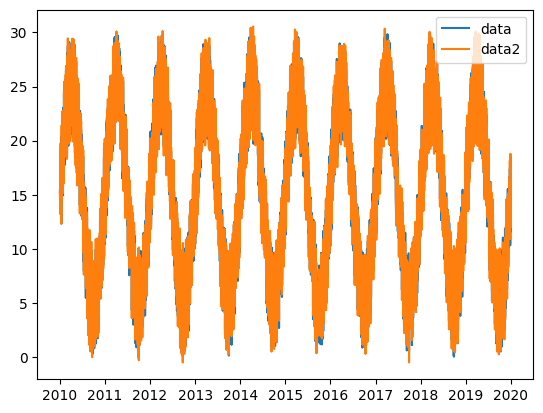

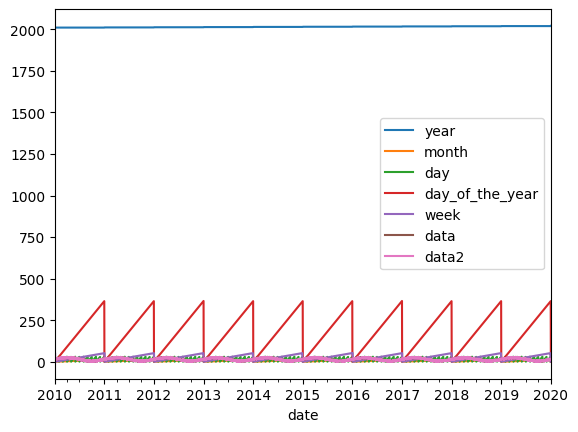

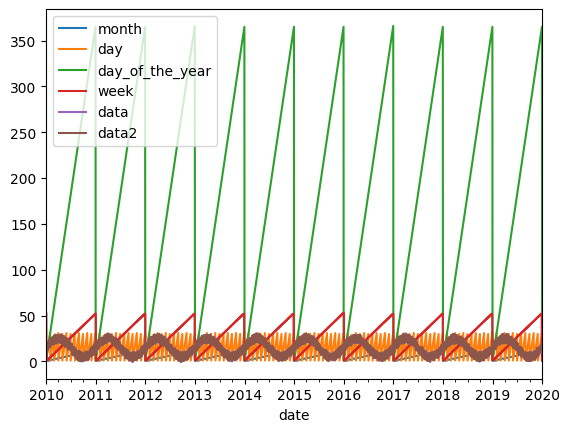

In [7]:
# It is a good idea to plot your data to see if there are any errors
# plot the uniform and radian columns against the date
plt.plot(date_df.index, date_df['data'], label='data')
plt.plot(date_df.index, date_df['data2'], label='data2')

plt.legend()
plt.show()

# use the builtin pandas plot routine to plot all the numerical data
# in the dataframe
date_df.plot()
plt.show()

# drop the  year column from the plot because of the scale it was hard
# to see in the data in the other columns
date_df.drop('year', axis=1).plot()
plt.show()

# since we didn't use 'inplace=True' it only drops the column during the plot

# Plot Range (Your turn)
Create plots using only the data from 2014 through 2017.
Use both matplotlib and the builtin pandas .plot() method.

In [ ]:
# Enter your code hear to plot only 2014 through 2017
# Use matplotlib



# use the dataframe .plot() method



# Grouping
We can now look at means, medians, counts, std dev, etc for different time groups.

month_name
April        24.880297
August        7.861873
December     12.474797
February     21.895866
January      17.886465
July         12.311130
June         17.810653
March        24.427148
May          22.150578
November      7.943049
October       5.438777
September     5.051450
Name: data, dtype: float64


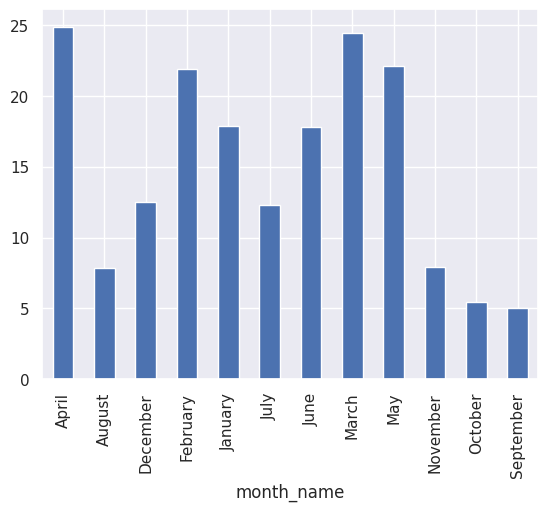

In [ ]:
# find the avereage of the 'data' column in each month
monthly_avg = date_df.groupby('month_name')['data'].mean()
print(monthly_avg)

monthly_avg.plot(kind='bar')
plt.show()

# Find the median value of data2 by month number to
# get things in the correct order


# enter your code here plot it when you are done

In [ ]:
# do the same thing for the weeks of the year for both data1 and data2
# find the median values and plot, should



In [ ]:
# For each year, count the number of data in the year
# do the same for each month
# why are they not all the same?

# Now look at days
Make a plot showing the median and average values by
day-of-the week (i.e., Monday, Tuesday, Wednesday, etc.)

In [ ]:
# code to look at days-of-the-week data

# Accident Data
Now we will start to look at the accident data in the Excel
Spreadsheet

In [ ]:
# read the data into a pandas data frame called accidents_df

accidents_df = pd.read_excel('accidents.xlsx')

# use the .head() method to check the data and see the column names


# print out the colmn names of the dataframe

# Change the data type of the Date column to datetime
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'])

# make 'Date' the index and look at the start of the data frame
accidents_df.set_index('Date', inplace=True)

accidents_df.head()

,Injury Location,Gender,Age Group,Incident Type,Days Lost,Plant,Report Type,Shift,Department,Incident Cost
Date,,,,,,,,,,
2020-01-01,Multiple,Male,25-34,Burn,0.0,Iowa,Near Miss,Afternoon,Painting,0
2020-01-03,NaN,Male,35-49,Vehicle,0.5,Alabama,Lost Time,Day,Fabrication,3367
2020-01-03,Eye,Male,18-24,Cut,0.0,Georgia,Near Miss,Day,Administration,0
2020-01-04,Legs,Female,50+,Falling object,0.0,Iowa,Near Miss,Day,Painting,0
2020-01-07,Legs,Male,25-34,Lifting,0.0,Ohio,Near Miss,Day,Painting,0


# Explore the data
How many unique values are there for:
- Location
- Age Group
- Plant
- Report Type
- Shift
- Department


Pick any three and print the information

In [ ]:
# Enter your code here to find the unique values in the columns

# Answer the following questions
* Which Gender has the most accidents?
 * how many?
* Which plant has the most accidents?
 * how many?

Make bar charts (3 different ones) that shows:

   * accident count per age group
   * accident count per plant
   * accident count per shift


In [ ]:
# Answer the questions here



# Now some more involved analysis and graphs:
* Print a table of the days lost for each plant
 * total for each plant with
    * sub-catatories of Gender
 * Make a bar chart

* Make a pie chart of the number of different types of accidents

* Make a pie chart of the accidents per age group

* Make a bar chart of the cost of the different types of accidents

In [ ]:
# do the table first
# Plant accident counts by gender


# see if you can make bar-charts with either side-by-side bars for the genders
# or stacked bars for the genders. Each plant either has two bars
# (male, female) or a single bar with two segments


# Pie chart of different types of accidents with size of pie slices
# representing the number of accidents


# Pie chart of the accidents per age group



# Bar chart of costs by accident type


# Analyze by days of the week
Make a bar chart showing
* which day of the week has the most accidents
* accident costs for each day of the week

Do the same for the months.

# Do some analysis on your own
Look at the table and see what questions you could answer

* Make some graphs.

* See if you can do more than one level of sub-catagory

In [ ]:
# Enter your code here
# Accidents by day-of-the-week


# Accidents by month

In [ ]:
# Your analysis
# do some multi-level groups